In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\users\prishitaray\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.contrib.layers import fully_connected

In [3]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [4]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [5]:
training_data.shape

(175341, 45)

In [6]:
training_labels=training_data[:,43]

In [7]:
training_features=training_data[:,0:43]

In [8]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [9]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [10]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [11]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [12]:
proto=np.unique(training_features[:,2])

In [13]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [14]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [15]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [16]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [17]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [18]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [19]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [20]:
d=dict.fromkeys(proto)

In [21]:
l=d.keys()

In [22]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [23]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [24]:
training_features

array([[1, 0.121478, 29, ..., 1, 1, 0],
       [2, 0.6499020000000001, 29, ..., 1, 6, 0],
       [3, 1.623129, 29, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 115, ..., 3, 12, 0],
       [175340, 9e-06, 115, ..., 30, 30, 0],
       [175341, 9e-06, 115, ..., 30, 30, 0]], dtype=object)

In [25]:
training_features[:,2]

array([29, 29, 29, ..., 115, 115, 115], dtype=object)

In [26]:
training_features.shape

(175341, 43)

In [27]:
std_list=[]

In [28]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [29]:
training_features

array([[-1.7320409294122083, -0.1910288091606379, -0.9907313167166802,
        ..., -0.715713656611942, -0.7530740174877311,
        -0.12650796304403503],
       [-1.7320211730425332, -0.10948479464168344, -0.9907313167166802,
        ..., -0.715713656611942, -0.28825700778157093,
        -0.12650796304403503],
       [-1.7320014166728581, 0.04069921785252289, -0.9907313167166802,
        ..., -0.5955425666085573, -0.28825700778157093,
        -0.12650796304403503],
       ...,
       [1.7320014166728581, -0.2097733588018406, 1.0350256394248076, ...,
        -0.4753714766051727, 0.26952340386582113, -0.12650796304403503],
       [1.7320211730425332, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503],
       [1.7320409294122083, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503]],
      dtype=object)

In [30]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [31]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [231]:
lr=0.01
actf=tf.nn.elu

In [232]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [233]:
initializer=tf.variance_scaling_initializer()

In [234]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [235]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [236]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [237]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [238]:
all_weights=[w1]+[w2]+[w3]+[w4]

l2_regularizer=tf.contrib.layers.l2_regularizer(scale=0.005,scope=None)
regularization_penalty=tf.contrib.layers.apply_regularization(l2_regularizer,all_weights)

In [239]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [240]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss+regularization_penalty)

In [241]:
init=tf.global_variables_initializer()

In [242]:
num_epoch=500
batch_size=10000

In [243]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [244]:
x=[]
y=[]
l=[]

In [245]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.5 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.4200926721096039
epoch 1 loss 0.3171050250530243
epoch 2 loss 0.23163364827632904
epoch 3 loss 0.203421950340271
epoch 4 loss 0.1526818722486496
epoch 5 loss 0.15159040689468384
epoch 6 loss 0.13433590531349182
epoch 7 loss 0.14315176010131836
epoch 8 loss 0.11839531362056732
epoch 9 loss 0.11520466953516006
epoch 10 loss 0.1224047988653183
epoch 11 loss 0.1157606840133667
epoch 12 loss 0.10644055902957916
epoch 13 loss 0.10286539047956467
epoch 14 loss 0.10090085119009018
epoch 15 loss 0.09564816206693649
epoch 16 loss 0.09180312603712082
epoch 17 loss 0.09192663431167603
epoch 18 loss 0.09818479418754578
epoch 19 loss 0.08784211426973343
epoch 20 loss 0.08803606778383255
epoch 21 loss 0.0898464024066925
epoch 22 loss 0.08915796130895615
epoch 23 loss 0.09149651974439621
epoch 24 loss 0.08962110430002213
epoch 25 loss 0.08308437466621399
epoch 26 loss 0.08829939365386963
epoch 27 loss 0.08963412791490555
epoch 28 loss 0.08113415539264679
epoch 29 loss 0.0956188067793846

epoch 239 loss 0.0627206340432167
epoch 240 loss 0.06703486293554306
epoch 241 loss 0.06894069910049438
epoch 242 loss 0.06510579586029053
epoch 243 loss 0.06662923842668533
epoch 244 loss 0.06505289673805237
epoch 245 loss 0.06590177863836288
epoch 246 loss 0.0628974437713623
epoch 247 loss 0.06839484721422195
epoch 248 loss 0.06606132537126541
epoch 249 loss 0.06362474709749222
epoch 250 loss 0.0642637237906456
epoch 251 loss 0.06264101713895798
epoch 252 loss 0.062098726630210876
epoch 253 loss 0.06555990129709244
epoch 254 loss 0.06389536708593369
epoch 255 loss 0.06677645444869995
epoch 256 loss 0.07114192843437195
epoch 257 loss 0.06554122269153595
epoch 258 loss 0.07184358686208725
epoch 259 loss 0.06513809412717819
epoch 260 loss 0.0650668516755104
epoch 261 loss 0.0643821433186531
epoch 262 loss 0.0644717812538147
epoch 263 loss 0.06519102305173874
epoch 264 loss 0.0653892382979393
epoch 265 loss 0.06656786799430847
epoch 266 loss 0.06844858825206757
epoch 267 loss 0.063379287

epoch 474 loss 0.06086455658078194
epoch 475 loss 0.06262661516666412
epoch 476 loss 0.06428685039281845
epoch 477 loss 0.06275886297225952
epoch 478 loss 0.06132291629910469
epoch 479 loss 0.06322737783193588
epoch 480 loss 0.06490501761436462
epoch 481 loss 0.062085289508104324
epoch 482 loss 0.0653952956199646
epoch 483 loss 0.0601101890206337
epoch 484 loss 0.06830017268657684
epoch 485 loss 0.0634952262043953
epoch 486 loss 0.06766372919082642
epoch 487 loss 0.0638732761144638
epoch 488 loss 0.06554929912090302
epoch 489 loss 0.06416545808315277
epoch 490 loss 0.06169300526380539
epoch 491 loss 0.06094443053007126
epoch 492 loss 0.06321266293525696
epoch 493 loss 0.06145205348730087
epoch 494 loss 0.0644853338599205
epoch 495 loss 0.06474171578884125
epoch 496 loss 0.06608131527900696
epoch 497 loss 0.06504277139902115
epoch 498 loss 0.06376521289348602
epoch 499 loss 0.06403468549251556
[[-2.50396371e-01  1.94945815e-03 -1.25433132e-01  2.22786829e-01
   1.90158099e-01  7.4438497

In [246]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [247]:
sum_weights

[0.7950352153275162,
 0.5022710036137141,
 -0.03717116313055158,
 0.9551360819023103,
 0.2949156095273793,
 0.23156870622187853,
 -0.9951208718121052,
 -0.13184950547292829,
 0.754413919406943,
 -0.39895084872841835,
 -0.09671545936726034,
 0.27741250954568386,
 -1.2416533315554261,
 -1.4102584654465318,
 -0.24643219634890556,
 -0.4332055461127311,
 -0.25250228587538004,
 0.27411713008768857,
 0.5016516468022019,
 0.042870056349784136,
 -0.25182299211155623,
 0.4096536161378026,
 0.9401268255896866,
 -1.0791291419882327,
 -0.13052585627883673,
 0.15527144915540703,
 -0.48566240444779396,
 -0.10349571658298373,
 -0.9989010458812118,
 -0.790475249523297,
 -0.04252866305614589,
 0.2240292839705944,
 -0.2636973993940046,
 -0.8286568040493876,
 -0.5898198708891869,
 -0.20813362672924995,
 -0.011611250694841146,
 0.28266585525125265,
 0.22871009132359177,
 -1.049190977588296,
 -0.5035054823383689,
 -0.5116541711031459,
 0.954320908524096]

In [248]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=sum_weights[i]
    var_imp.append(prod)

In [249]:
var_imp

[0.7950352153275162,
 0.5022710036137141,
 -0.03717116313055158,
 0.9551360819023103,
 0.2949156095273793,
 0.23156870622187853,
 -0.9951208718121052,
 -0.13184950547292829,
 0.754413919406943,
 -0.39895084872841835,
 -0.09671545936726034,
 0.27741250954568386,
 -1.2416533315554261,
 -1.4102584654465318,
 -0.24643219634890556,
 -0.4332055461127311,
 -0.25250228587538004,
 0.27411713008768857,
 0.5016516468022019,
 0.042870056349784136,
 -0.25182299211155623,
 0.4096536161378026,
 0.9401268255896866,
 -1.0791291419882327,
 -0.13052585627883673,
 0.15527144915540703,
 -0.48566240444779396,
 -0.10349571658298373,
 -0.9989010458812118,
 -0.790475249523297,
 -0.04252866305614589,
 0.2240292839705944,
 -0.2636973993940046,
 -0.8286568040493876,
 -0.5898198708891869,
 -0.20813362672924995,
 -0.011611250694841146,
 0.28266585525125265,
 0.22871009132359177,
 -1.049190977588296,
 -0.5035054823383689,
 -0.5116541711031459,
 0.954320908524096]

In [250]:
features=list(range(1,44))
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [257]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

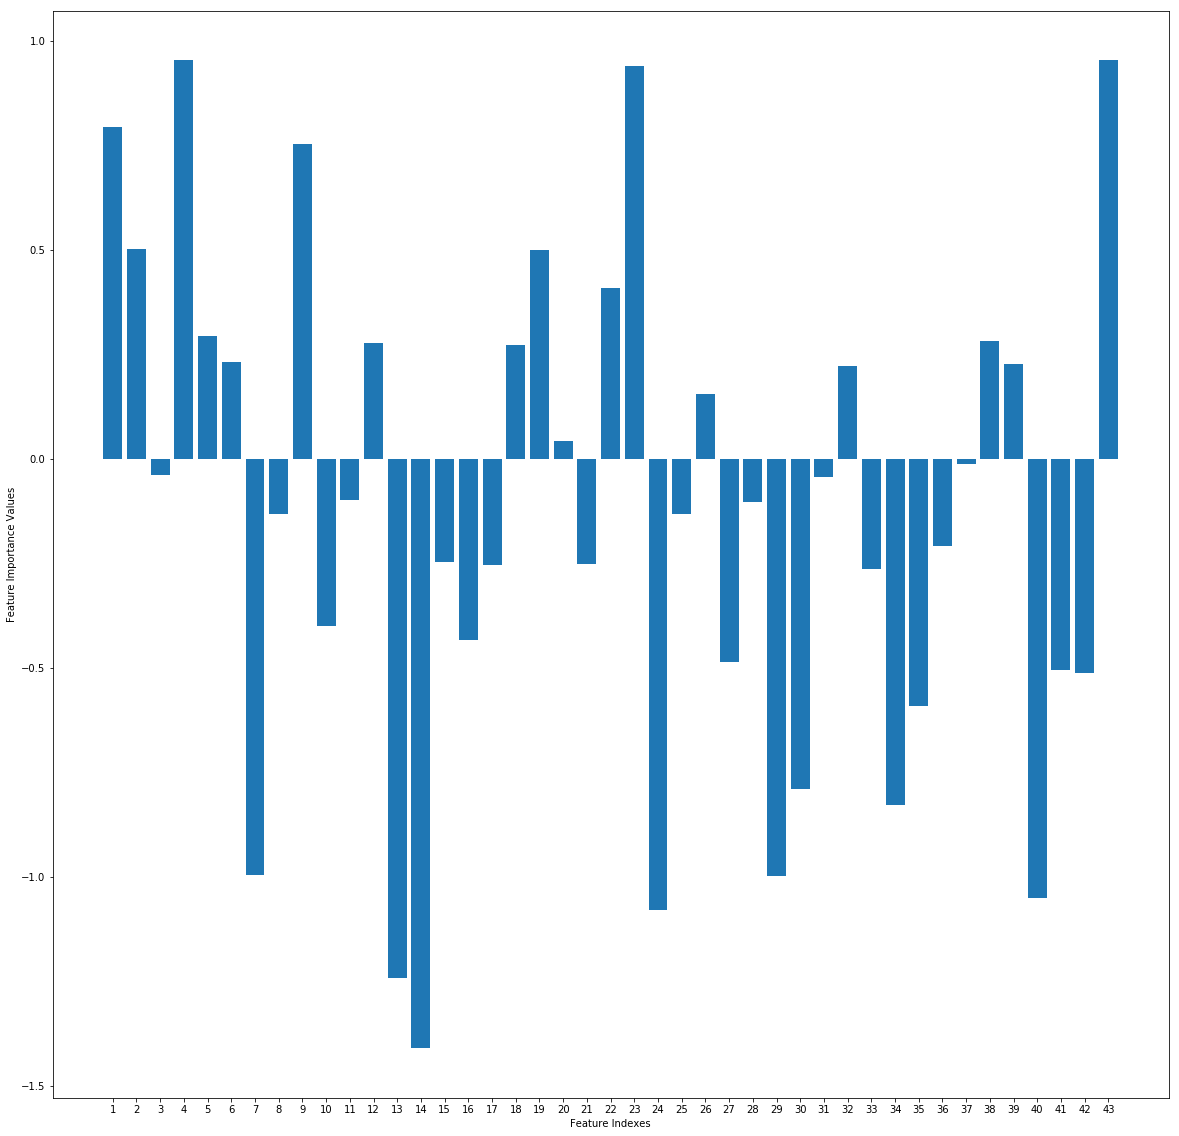

In [258]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")


In [259]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [260]:
for i in best_features:
    print(feature_names[i])

service
is_sm_ips_ports
dtcpb
id
dbytes
dur
sjit
stcpb
state
is_ftp_login


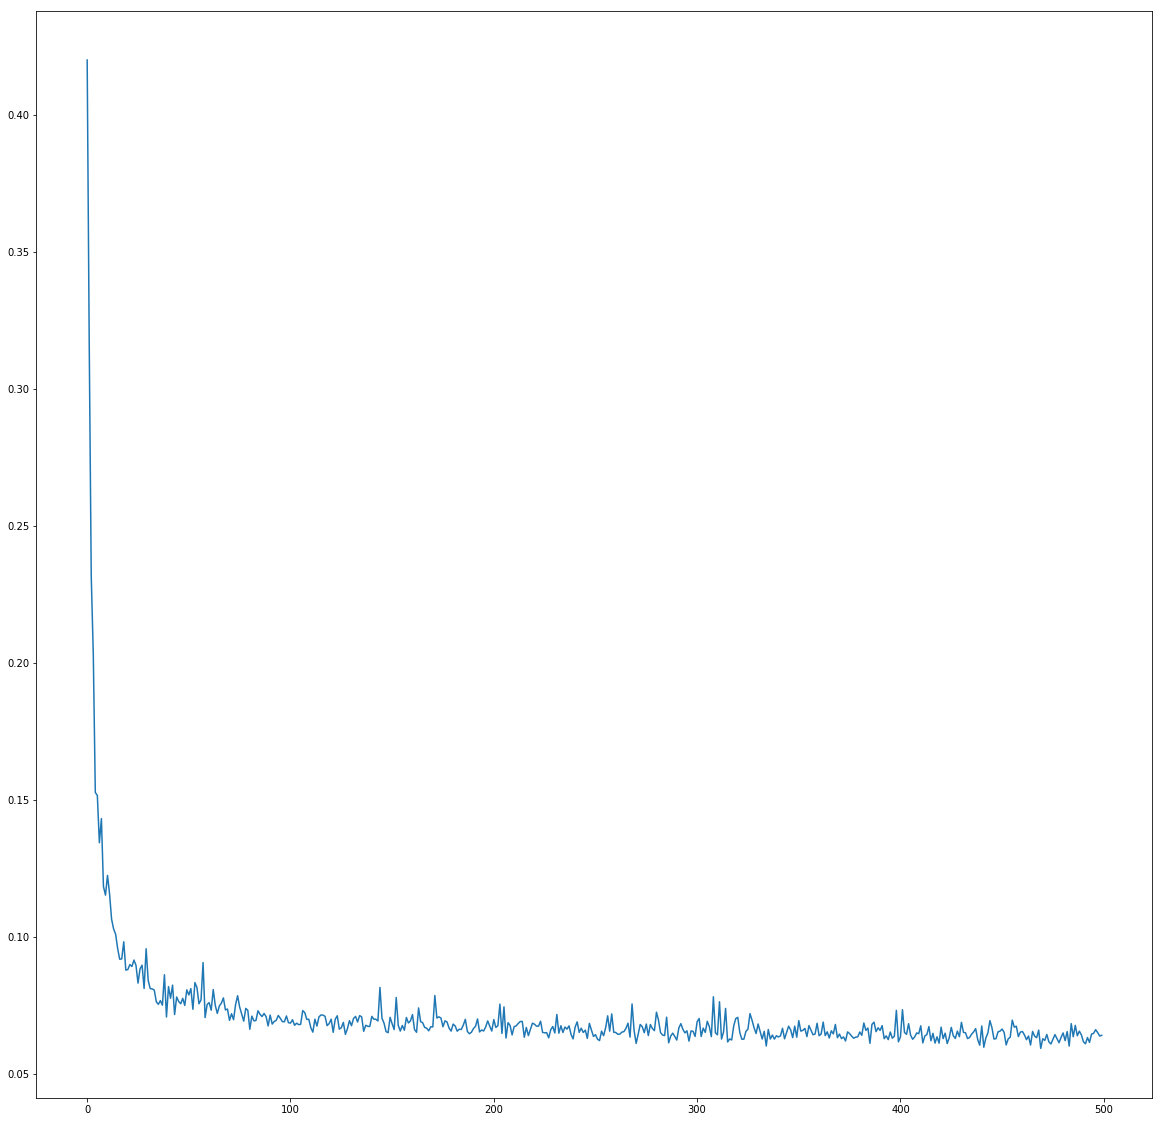

In [261]:
plt.rcParams['figure.figsize']=(20,20)
plt.plot(x,y)

In [262]:
print(np.var(var_imp))

0.3566338071727379
